# Energie et environment en Belgique

Le dataset est tiré d'un site web gouvernemental:: http://ibsa.brussels/themes/environnement-et-energie?set_language=fr#.XHfBHuhKhXw 

Les données rassemblées ici portent sur le climat, la qualité de l’air, la consommation et la qualité de l’eau, les collectes de déchets, les espaces verts, la biodiversité, la consommation énergétique, etc.

In [77]:
import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

pd.options.display.max_rows = 55
pd.options.display.max_colwidth = 500

In [32]:
link1 = '12.1_environnement_energie_environnement_territoire_20180220.xlsx'
link2 = '12.2_environnement_energie_environnement_societe_20180829.xlsx'
link3 = '12.3_environnement_energie_energie_20180829.xlsx'

### Link1 
12.1.1.1 climatologigue a Uccle 

12.1.1. qualité de l'air en Bruxelles-Capitale 2005-2017
2 concentrations en dioxyde d'azote (NO2)
3 concentrations en ozone (O3)
4 concentrations en particules en suspension de diamètre inférieur à 10 µm
5 concentrations en particules en suspension de diamètre inférieur à 2,5 µm 

 12.2.1 Qualité écologique globalea1 des eaux des cours d'eau et étangs en Région de Bruxelles-Capitale : 2004-2016
 12.1.3.1 Superficie des parcelles cadastrales selon leur nature en Région de Bruxelles-Capitale : 2005-2017
 12.1.3.2 Part des surfaces imperméables par commune : 1955-1970-1985-1993-2006
 12.1.3.3 Parcelles présentant un sol potentiellement pollué ou pollué en Région de Bruxelles-Capitale : inventaire au 1er février 2018

 12.1.4.1 Nombre d'espèces et statut des principaux groupes de faune et de flore en Région de Bruxelles-Capitale
 Superficie des espaces bénéficiant d'un statut de protection de la nature (direct ou indirect) en Région de Bruxelles-Capitale (au 1er janvier 2018)

### Link 2

#### Eau
Tableau 12.2.1.1 
Approvisionnement en eau potable de distribution en Région de Bruxelles-Capitale : 2005-2017
Tableau 12.2.1.2
Consommation d'eau dans les communes bruxelloises - nombre de compteurs et d'abonnés : 2005-2017
Tableau 12.2.1.3
Consommation d'eau dans les communes bruxelloises - consommation facturée en m3 : 2005-2017
Tableau 12.2.1.4
Qualité des eaux de distribution en Région de Bruxelles-Capitale - paramètres indicateurs, microbiologiques et chimiques : 2005-2017

#### Dechets
Tableau 12.2.2.1
Collectes de déchets de Bruxelles-Propreté par type de déchet et destination (anciennes méthodologie et terminologie)a1 : 2009-2014
Tableau 12.2.2.2
Collectes de déchets de Bruxelles-Propreté par type de déchet et mode de valorisation (nouvelles méthodologie et terminologie)a1 : 2014-2017
Tableau 12.2.2.3
Modes de valorisation des déchets ménagers collectés par Bruxelles-Propreté : 2017
Tableau 12.2.2.4
Recyclage des matériaux d'emballages ménagers collectés : 2005-2017


Tableau 12.2.3.1
Commodités des logements privés occupés - logements équipés de jardins et citernes d'eau de pluie : 2001
Tableau 12.2.3.2
Appréciation de la propreté, qualité de l'air et de la tranquilité du quartier : 2001
Tableau 12.2.3.3
Appréciation de la qualité de l'environnement dans trois villes belges (Enquête de perception de l'Audit Urbain) : 2015
Tableau 12.2.3.4 
Espaces verts et récréatifs accessibles au public en Région de Bruxelles-Capitale : 2009

Tableau 12.2.4.1
Délits enregistrés contre l'environnement : 2005-2017

#### Link 3
Tableau 12.3.1.1
Consommation totale finale d'énergie selon le vecteur : 2000-2016 
Tableau 12.3.1.2
Consommation totale finale d'énergie selon le secteur : 2000-2016
Tableau 12.3.1.3
Consommation totale finale d'énergie selon le vecteur dans le secteur du logement : 2000-2016
Tableau 12.3.1.4
Consommation totale finale d'énergie selon le vecteur dans le secteur tertiaire : 2000-2016 
Tableau 12.3.1.5
Consommation totale finale d'énergie selon la branche d'activité dans le secteur tertiaire : 2000-2016 
Tableau 12.3.1.6
Consommation totale finale d'énergie selon le vecteur dans le secteur du transport : 2000-2016
Tableau 12.3.1.7
Consommation totale finale d'énergie selon le mode dans le secteur du transport : 2000-2016
Tableau 12.3.1.8
Consommation totale finale d'énergie selon le vecteur dans le secteur de l'industrie : 2000-2016
Tableau 12.3.1.9
Consommation totale finale d'énergie selon la branche d'activité dans le secteur de l'industrie : 2000-2016 
Tableau 12.3.2.1 
Points de fourniture d'électricité par commune : 2005-2017
Tableau 12.3.2.2 
Électricité transportée par commune : 2005-2017
Tableau 12.3.2.3 
Points de fourniture de gaz par commune : 2005-2017 
Tableau 12.3.2.4 
Gaz transporté par commune : 2005-2017
Tableau 12.3.3.1 
Flux d'électricité vers les clients finaux régionaux : 2006-2017
Tableau 12.3.3.2 
Flux de gaz vers les clients finaux régionaux : 2006-2017

In [28]:
xl = pd.ExcelFile(link3)

for sheet in xl.sheet_names[1:]:
    print(xl.parse(sheet).columns[0])

Tableau 12.3.1.1
Consommation totale finale d'énergie selon le vecteur : 2000-2016 
Tableau 12.3.1.2
Consommation totale finale d'énergie selon le secteur : 2000-2016
Tableau 12.3.1.3
Consommation totale finale d'énergie selon le vecteur dans le secteur du logement : 2000-2016
Tableau 12.3.1.4
Consommation totale finale d'énergie selon le vecteur dans le secteur tertiaire : 2000-2016 
Tableau 12.3.1.5
Consommation totale finale d'énergie selon la branche d'activité dans le secteur tertiaire : 2000-2016 
Tableau 12.3.1.6
Consommation totale finale d'énergie selon le vecteur dans le secteur du transport : 2000-2016
Tableau 12.3.1.7
Consommation totale finale d'énergie selon le mode dans le secteur du transport : 2000-2016
Tableau 12.3.1.8
Consommation totale finale d'énergie selon le vecteur dans le secteur de l'industrie : 2000-2016
Tableau 12.3.1.9
Consommation totale finale d'énergie selon la branche d'activité dans le secteur de l'industrie : 2000-2016 
Tableau 12.3.2.1 
Points de fo

In [48]:
xl = pd.ExcelFile(link2)
#print(xl.sheet_names)

df1 = xl.parse(sheet_name= '12.2.2.4', header=1)


## Recyclage des matériaux d'emballages ménagers collectés : 2005-2017

- Unité : tonne\n Échelle géographique : région\nSource : Fost Plus
- a1 : Hors verre horeca (20.642 tonnes en 2017 pour les trois régions)
- a2 : Les totaux des papiers, cartons à boisson, plastiques et métaux (PMC) pour la Belgique ne correspondent pas toujours aux totaux des trois régions. Il faut y inclure des tonnages qui ne peuvent pas affectés à une région particulière (voir fichier méthodologique)
- a3 : Cette catégorie comprend les matières recyclées "hors scénario de base", majoritairement du polyéthylène, du polypropylène et du polystyrène

In [75]:
recyclage = df1

recy = recyclage.reset_index()

recy.columns.values[0]= 'region'

recy = recy.iloc[:52]
recy =recy.replace('Belgiquea2', 'Belgique')

In [80]:
rec = recy.groupby(['region', 'Année']).sum()

In [86]:
rec = rec.reset_index()

In [130]:
rec.head()

,region,Année,Verrea1,Papier-carton,Cartons à boisson,Plastiques (dont bouteilles et flacons),Métaux
0,Belgique,2005.0,302172.0,177977.0,14419.0,55460.0,83274.0
1,Belgique,2006.0,305725.0,197678.0,13788.0,61113.0,84234.0
2,Belgique,2007.0,307608.0,186562.0,14657.0,65271.0,81758.0
3,Belgique,2008.0,314583.0,189426.0,14513.0,66990.0,80632.0
4,Belgique,2009.0,318242.0,183653.0,14855.0,69027.0,83094.0


**Nous devons prendre en compte le nombre d'habitants par région.**

Le dataset de la population est tiré du site web: https://bestat.statbel.fgov.be/bestat/crosstable.xhtml?view=bd99d3d7-5019-44f7-991e-050a9d991641 

In [108]:
pop = pd.read_csv("Region_population.csv").drop('Belgique', axis=1)

pop = pop.fillna('Belgique')
pop.columns = ['region'] + [year for year in range(2005, 2018)]

In [109]:
pop = pd.melt(pop, id_vars='region', var_name='Année', value_name= 'population')

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
region        52 non-null object
Année         52 non-null object
population    52 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [110]:
pop['Année'] = pd.to_numeric(pop['Année'])

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
region        52 non-null object
Année         52 non-null int64
population    52 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [114]:
eco = rec.merge(pop, on=['Année', 'region'], how='left')

eco

,region,Année,Verrea1,Papier-carton,Cartons à boisson,Plastiques (dont bouteilles et flacons),Métaux,population
0,Belgique,2005.0,302172.0,177977.0,14419.0,55460.0,83274.0,10445852
1,Belgique,2006.0,305725.0,197678.0,13788.0,61113.0,84234.0,10511382
2,Belgique,2007.0,307608.0,186562.0,14657.0,65271.0,81758.0,10584534
3,Belgique,2008.0,314583.0,189426.0,14513.0,66990.0,80632.0,10666866
4,Belgique,2009.0,318242.0,183653.0,14855.0,69027.0,83094.0,10753080
5,Belgique,2010.0,319768.0,185471.0,15532.0,71381.0,83478.0,10839905
6,Belgique,2011.0,327022.0,185642.0,15246.0,74966.0,84895.0,10951266
7,Belgique,2012.0,318696.0,178291.0,15988.0,74240.0,84112.0,11035948
8,Belgique,2013.0,320968.0,170523.0,16241.0,77529.0,79662.0,11099554
9,Belgique,2014.0,320712.0,174307.0,16854.0,79910.0,76204.0,11150516


In [139]:
#Changement de tonnes à kilos

for column in eco.columns[2:7]: 
    eco[column+'/pop']= eco[column]/eco['population']*1000

eco

,region,Année,Verrea1,Papier-carton,Cartons à boisson,Plastiques (dont bouteilles et flacons),Métaux,population,Verre/pop,Verrea1/pop,Papier-carton/pop,Cartons à boisson/pop,Plastiques (dont bouteilles et flacons)/pop,Métaux/pop
0,Belgique,2005.0,302172.0,177977.0,14419.0,55460.0,83274.0,10445852,0.028927,28.927463,17.038055,1.380357,5.309284,7.971968
1,Belgique,2006.0,305725.0,197678.0,13788.0,61113.0,84234.0,10511382,0.029085,29.085138,18.806090,1.311721,5.813983,8.013599
2,Belgique,2007.0,307608.0,186562.0,14657.0,65271.0,81758.0,10584534,0.029062,29.062026,17.625906,1.384756,6.166639,7.724289
3,Belgique,2008.0,314583.0,189426.0,14513.0,66990.0,80632.0,10666866,0.029492,29.491605,17.758356,1.360568,6.280195,7.559109
4,Belgique,2009.0,318242.0,183653.0,14855.0,69027.0,83094.0,10753080,0.029595,29.595428,17.079107,1.381465,6.419277,7.727460
5,Belgique,2010.0,319768.0,185471.0,15532.0,71381.0,83478.0,10839905,0.029499,29.499152,17.110021,1.432854,6.585021,7.700990
6,Belgique,2011.0,327022.0,185642.0,15246.0,74966.0,84895.0,10951266,0.029862,29.861570,16.951647,1.392168,6.845419,7.752072
7,Belgique,2012.0,318696.0,178291.0,15988.0,74240.0,84112.0,11035948,0.028878,28.877990,16.155477,1.448720,6.727107,7.621638
8,Belgique,2013.0,320968.0,170523.0,16241.0,77529.0,79662.0,11099554,0.028917,28.917198,15.363050,1.463212,6.984875,7.177045
9,Belgique,2014.0,320712.0,174307.0,16854.0,79910.0,76204.0,11150516,0.028762,28.762077,15.632191,1.511500,7.166484,6.834123


## Visualisation

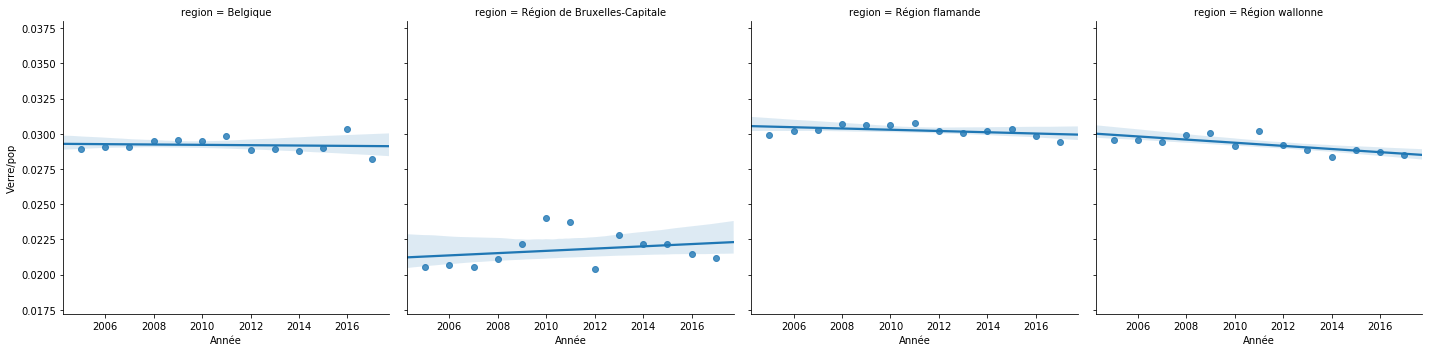

In [134]:
sns.lmplot(data=eco, x="Année", y="Verre/pop", col="region", fit_reg=True)

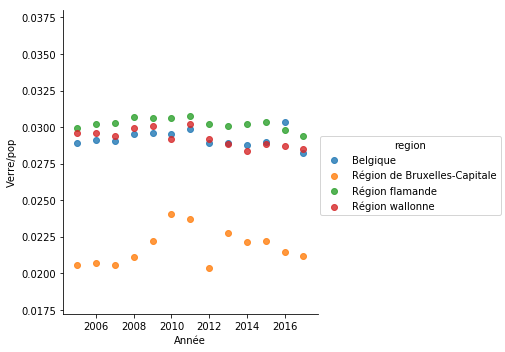

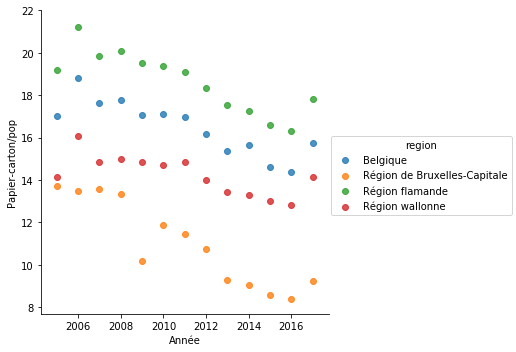

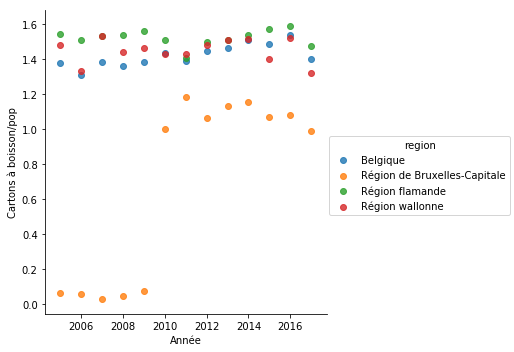

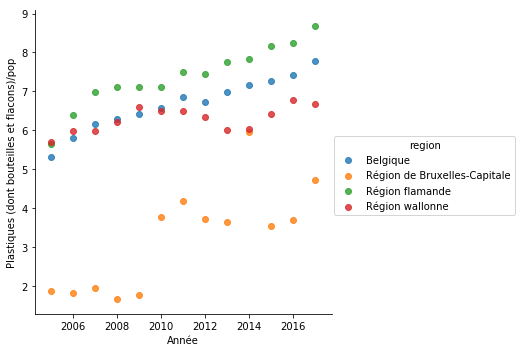

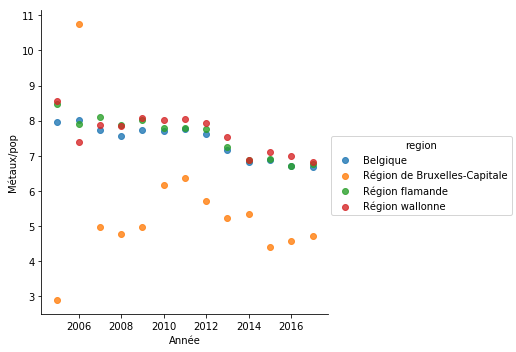

In [135]:
list = ["Verre/pop", 'Papier-carton/pop',
       'Cartons à boisson/pop', 'Plastiques (dont bouteilles et flacons)/pop',
       'Métaux/pop']

for y in list: 
    sns.lmplot(data=eco, x="Année", y=y, hue="region", fit_reg=False)

La région flamande a le mellieur performance de tout, à l'exception du recyclage des métaux. Malheureusement, Bruxelles a le pire performance. 

### Questions: 
    - Rélation entre recyclage et la reduction du consume. 
    - Rélation avec la quantit
    - Politiques gouvernementales en matière de recyclage. 
    - 